In [31]:
import pandas as pd
import tensorflow as tf
import re
import json


In [32]:
file = 'valid-data.json'
with open(file) as train_file:
    dict_train = json.load(train_file)


In [33]:
df = pd.json_normalize(dict_train[1:])

In [34]:
df

,timestamp,position.x,position.y,position.z,position.quality
0,1598152118006,-3.841946,7.926755,-0.033847,67
1,1598152118005,-9.076024,-4.477330,-0.058161,83
2,1598152118030,-3.685511,8.012804,-0.036006,86
3,1598152118080,-3.447886,8.039709,-0.068640,86
4,1598152118423,-2.924334,7.900291,0.162582,96
...,...,...,...,...,...
26027,1598154759585,22.784122,2.301751,2.445111,72
26028,1598154759789,16.489519,-1.801548,2.953061,94
26029,1598154759789,23.284721,2.977140,1.222459,90
26030,1598154759880,16.246746,-1.885520,2.427024,94


In [35]:
file1 = './all-data.json'
with open(file1) as train_file:
    all_data = json.load(train_file)

In [36]:
df2 = pd.json_normalize(all_data[1:])

In [37]:
df2.drop(columns = ['topic','message','_id.$oid','timestamp.$numberLong'], inplace = True)

In [38]:
df2.dtypes

timestamp            object
position.x           object
position.y           object
position.z           object
position.quality    float64
dtype: object

In [39]:
date_time2 = pd.to_datetime(df2['timestamp'], unit = 'ms')

In [40]:
date_time = pd.to_datetime(df['timestamp'], unit = 'ms')

<Figure size 4500x3000 with 0 Axes>

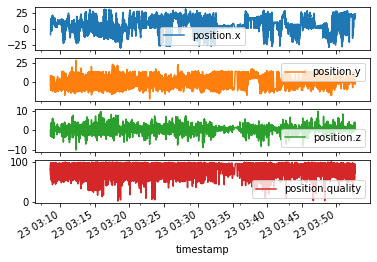

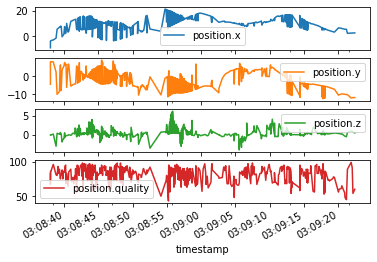

In [49]:
from matplotlib.pyplot import figure
figure(figsize=(30, 20), dpi=150)
plot_cols = ['position.x',	'position.y'	,'position.z',	'position.quality']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)
plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [50]:
df.describe()

,position.x,position.y,position.z,position.quality
count,26032.000000,26032.000000,26032.000000,26032.000000
mean,5.364982,0.925692,0.585733,77.605947
std,11.668674,6.912533,1.214121,15.107464
min,-29.478020,-21.156071,-10.038864,2.000000
25%,-0.360913,-4.724915,0.031292,69.000000
50%,5.622491,0.809633,0.548526,81.000000
75%,15.323358,5.899458,1.068801,89.000000
max,30.545200,28.281576,9.851962,99.000000


In [66]:
df[df['position.y'] > 28].count()

timestamp           5
position.x          5
position.y          5
position.z          5
position.quality    5
dtype: int64

In [67]:
df[df['position.z'] > 9].count()

timestamp           16
position.x          16
position.y          16
position.z          16
position.quality    16
dtype: int64

# 